In [24]:
%load_ext autoreload
%autoreload 2

# add src to sys-path
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../src')
from matplotlib.pyplot import figure

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = pd.read_csv('4265746094.csv')
datav = data.query("Message == 'record'").values
print(datav[5])       

['Data' 15 'record' 'timestamp' '943100309' 's' 'distance' '0.0' 'm'
 'altitude' 516.0 'm' 'unknown' 0.0 nan 'unknown' '100' nan 'heart_rate'
 97.0 'bpm' 'cadence' '0' 'rpm' 'temperature' 29.0 'C'
 'fractional_cadence' 0.0 'rpm' 'enhanced_altitude' 516.0 'm'
 'SensorAltitude' 517.08826 'm' 'SensorHeading' 1.6572205000000002 'rad'
 'SensorPressure' 102194.984 'Pa' 'SensorAccelerationX' 486.0 'mgn'
 'SensorAccelerationY' 226.0 'mgn' 'SensorAccelerationZ' -814.0 'mgn'
 'SensorAccelerationX_HD'
 '724|212|-544|-668|-1420|-312|-288|-652|-592|-164|-116|-636|-324|576|912|-312|260|812|2032|1184|484|188|-8|-188|-204'
 'mgn' 'SensorAccelerationY_HD'
 '1224|204|412|948|4128|1664|-2052|1288|1232|616|484|-576|452|1428|4564|1752|-1984|-112|3016|1740|252|212|616|840|708'
 'mgn' 'SensorAccelerationZ_HD'
 '-468|52|988|856|1144|2116|880|1316|-912|-48|664|496|1328|1788|-344|88|696|-244|-1248|-1076|-796|-608|-516|-472|-376'
 'mgn' nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan

In [40]:
def filter_data(df):
    COLUMNS = ['distance', 'heart_rate', 'altitude', 'SensorHeading', 'SensorAccelerationX_HD', 'SensorAccelerationY_HD', 'SensorAccelerationZ_HD']
    result = {}

    for row in df:
        current_object = {}
        current_objects = []
        current_timestamp = 0
        for i in range(len(row)):
            column = row[i]

            if column == 'timestamp':
                current_timestamp = row[i+1]
            elif column in COLUMNS:
                current_object[column] = row[i+1]
        result[current_timestamp] = current_object

    return result

filtered_data = filter_data(datav)

In [41]:
def split_hd_values(data):
    result = {}
    for timestamp, row in data.items():

        if 'SensorAccelerationX_HD' in row:
            if (type(row['SensorAccelerationX_HD']) is str):
                hd_values_x = row['SensorAccelerationX_HD'].split('|')
                hd_values_y = row['SensorAccelerationY_HD'].split('|')
                hd_values_z = row['SensorAccelerationZ_HD'].split('|')

                for i in range(len(hd_values_x)):
                    new_row = row.copy()
                    new_row['SensorAccelerationX_HD'] = float(hd_values_x[i])
                    new_row['SensorAccelerationY_HD'] = float(hd_values_y[i])
                    new_row['SensorAccelerationZ_HD'] = float(hd_values_z[i])
                    result[int(timestamp) * 1000 + i*4] = new_row
        else:
            result[timestamp] = row

    return result

filtered_split_data = split_hd_values(filtered_data)

In [42]:
def get_values_for(data, key):
    return [row[key] for row in list(data.values()) if key in row]

In [43]:
timestamps = list(filtered_split_data.keys())
distance = get_values_for(filtered_split_data, 'distance')
heart_rate = get_values_for(filtered_split_data, 'heart_rate')
altitude = get_values_for(filtered_split_data, 'altitude')
sensor_heading = get_values_for(filtered_split_data, 'SensorHeading')
accX_HD = get_values_for(filtered_split_data, 'SensorAccelerationX_HD')
accY_HD = get_values_for(filtered_split_data, 'SensorAccelerationY_HD')
accZ_HD = get_values_for(filtered_split_data, 'SensorAccelerationZ_HD')


Text(0, 0.5, 'Altitude')

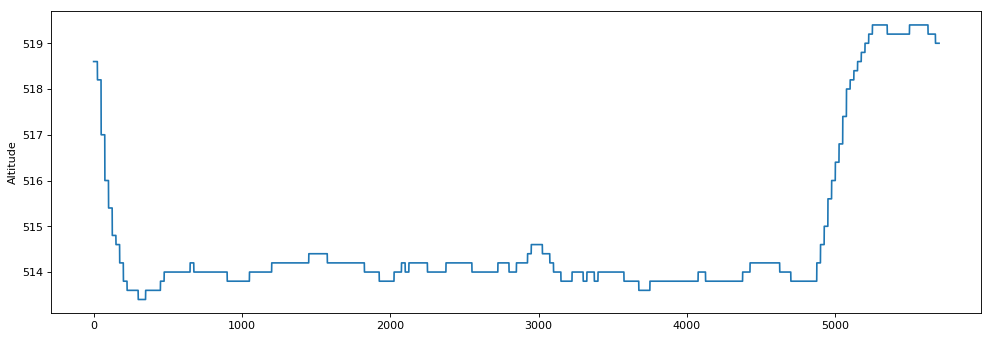

In [44]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(altitude)
plt.ylabel('Altitude')

Text(0, 0.5, 'Heading')

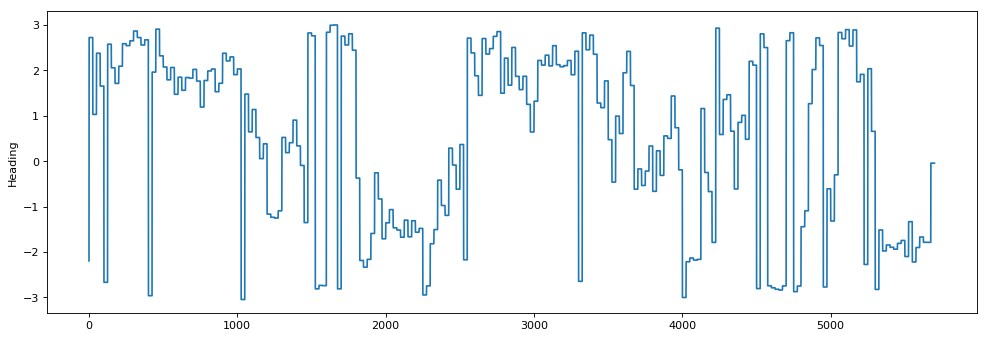

In [45]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sensor_heading)
plt.ylabel('Heading')

Text(0, 0.5, 'Heart Rate')

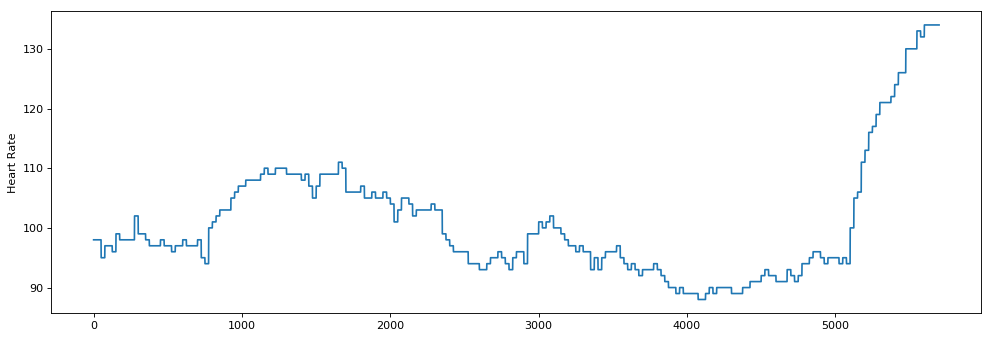

In [46]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(heart_rate)
plt.ylabel('Heart Rate')

Text(0, 0.5, 'Acceleration')

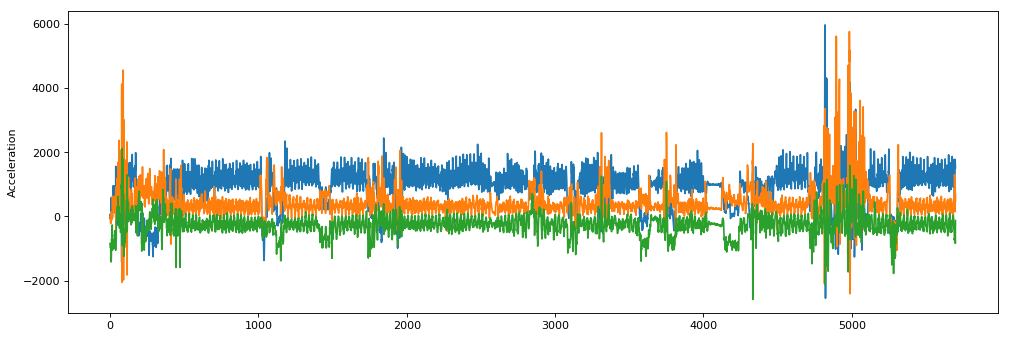

In [48]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(accX_HD)
plt.plot(accY_HD)
plt.plot(accZ_HD)
plt.ylabel('Acceleration')